<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Customer Analysis </h1></center> 

<left><h2 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
About the Project</h2></left>    

This project entails carrying out customer analysis by performing supervised and unsupervised machine learning models. The main objective of the project was to design two models as follows: -

Customer Analysis (unsupervised learning) using the KMeans Clustering method.

A classification model (supervised learning) to determine whether customers will purchase the company’s product or not.

Generally, this report outlines the dataset used, the methodology employed, and the steps for training and evaluation, and provides an in-depth analysis of the model's performance and its potential applications.

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Dataset Features</h3>

**People:**

* `ID`: Customer's unique identifier
* `Year_Birth`: Customer's birth year
* `Education`: Customer's education level
* `Marital_Status`: Customer's marital status
* `Income`: Customer's yearly household income
* `Kidhome`: Number of children in customer's household
* `Teenhome`: Number of teenagers in customer's household
* `Dt_Customer`: Date of customer's enrollment with the company
* `Recency`: Number of days since customer's last purchase
* `Complain`: 1 if the customer complained in the last 2 years, 0 otherwise

**Products:**

* `MntWines`: Amount spent on wine in last 2 years
* `MntFruits`: Amount spent on fruits in last 2 years
* `MntMeatProducts`: Amount spent on meat in last 2 years
* `MntFishProducts`: Amount spent on fish in last 2 years
* `MntSweetProducts`: Amount spent on sweets in last 2 years
* `MntGoldProds`: Amount spent on gold in last 2 years

**Promotion:**

* `NumDealsPurchases`: Number of purchases made with a discount
* `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place:**

* `NumWebPurchases`: Number of purchases made through the company’s website
* `NumCatalogPurchases`: Number of purchases made using a catalogue
* `NumStorePurchases`: Number of purchases made directly in stores
* `NumWebVisitsMonth`: Number of visits to company’s website in the last month

***Python Libraries Used in this Project***

In [2]:
'''
importing various libraries to be used in the code
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

***Reading The CSV File***

In [3]:
data = pd.read_csv("customer_train.csv") 

***EDA (Exploratory Data Analysis):***

**Data Cleaning, Handling Null Values, Feature Selection and Engineering, and Data Visualization.**

In [4]:
data.shape

(1680, 31)

In [5]:
data.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Define a function to delete a column
def delete_column(df, column_name):
    if column_name in df.columns:
        del df[column_name]
        return df
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return df


# Delete column 'Unnamed'
data = delete_column(data, 'Unnamed: 0')
data = delete_column(data, 'Unnamed: 0.1')
# Print the DataFrame after deleting the column
print(data)

        ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0     5524        1957        S1         Lajang  58138000.0        0   
1     2174        1954        S1         Lajang  46344000.0        1   
2     4141        1965        S1    Bertunangan  71613000.0        0   
3     6182        1984        S1    Bertunangan  26646000.0        1   
4     5324        1981        S3        Menikah  58293000.0        1   
...    ...         ...       ...            ...         ...      ...   
1675  4712        1991        D3    Bertunangan  20193000.0        0   
1676  1170        1975        S1        Menikah  27573000.0        1   
1677  6347        1979       SMA         Lajang  15862000.0        1   
1678  4065        1976        S3        Menikah  49544000.0        1   
1679  8230        1980        S1        Menikah  33228000.0        1   

      Teenhome Dt_Customer  Recency  MntCoke  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58   635000  ...              

In [8]:
'''
Checking the data for possible null values
'''
data.isnull().sum() # notice that the "Income" column has about 17 rows with null values
                    # hence, required to handle the null values accordingly

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:

data['Income'].fillna(data['Income'].mean(skipna=True), inplace=True)  # filling the null values with the mean.
data.isnull().sum()# cross-checking the dataframe

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

***Feature Engineering***

In [10]:

data['AcceptedCmp1'].unique()
data['AcceptedCmp2'].unique()
data['AcceptedCmp3'].unique()
data['AcceptedCmp4'].unique()
data['AcceptedCmp5'].unique()
data['Response'].unique()

array([1, 0], dtype=int64)

The output array([1, 0], dtype=int64) indicates that the unique values present in each of the specified columns (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, and Response) are 1 and 0.

The fact that the unique values in each of these columns are [1, 0] suggests that the data is binary, representing yes/no or true/false outcomes for each campaign acceptance and the response.

In [11]:
'''
Since 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response' all represents the costumers decision to buy or not to buy during promotion campaigns,
we merge the 6 columns into 1.
The new column is called "Purchased".
'''
data['Purchased'] = np.where((data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']) > 0, 1, 0) # this means, if the summation of each row from all the 6 columns is greater than 0
                                                                                                                                                                              # then, the customer purchased the company's product i.e 1. Otherwise the customer did not purchase i.e 0
data = data.drop('AcceptedCmp1', axis=1)
data = data.drop('AcceptedCmp2', axis=1)
data = data.drop('AcceptedCmp3', axis=1)
data = data.drop('AcceptedCmp4', axis=1)
data = data.drop('AcceptedCmp5', axis=1)
data = data.drop('Response', axis=1)


In [12]:
# Display the updated DataFrame
print("Updated DataFrame:\n", data.head())

Updated DataFrame:
      ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0  5524        1957        S1         Lajang  58138000.0        0         0   
1  2174        1954        S1         Lajang  46344000.0        1         1   
2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  ...  MntGoldProds  NumDealsPurchases  \
0  04-09-2012       58   635000  ...         88000                  3   
1  08-03-2014       38    11000  ...          6000                  2   
2  21-08-2013       26   426000  ...         42000                  1   
3  10-02-2014       26    11000  ...          5000                  2   
4  19-01-2014       94   173000  ...         15000                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWeb

In [13]:
'''
Checking the resulting "Purchased" column after changes
'''
data['Purchased'].value_counts()          
# The result shows that, after running 6 promotion campaigns, 442 costumers purchased while 1238 did not purchase the product.

Purchased
0    1238
1     442
Name: count, dtype: int64

In [14]:
data['Kidhome'].unique()
data['Teenhome'].unique()

array([0, 1, 2], dtype=int64)

The output array([0, 1, 2], dtype=int64) for the columns Kidhome and Teenhome indicates that the unique values present in these columns are 0, 1, and 2.

In [15]:
'''
Since the "Kidhome" and "Teenhome" both represents the costumers children and both have similar unique values, we will merge the 2 columns into 1.
The new column is called "Children".
'''
data['Children'] = data['Kidhome'] + data['Teenhome']
data = data.drop('Kidhome', axis=1)
data = data.drop('Teenhome', axis=1)

In [16]:
'''
Checking the resulting "Children" column after changes
'''
data['Children'].value_counts()         
# The result shows that 1195 costumers have children at home while 485 do not have children at home.

Children
1    836
0    485
2    313
3     46
Name: count, dtype: int64

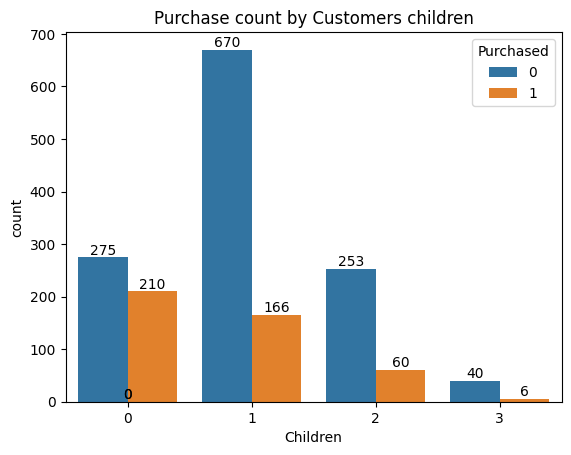

<Figure size 640x480 with 0 Axes>

In [17]:
'''
Creating the countplot of the number of purchases by customers children.
'''
ax = sns.countplot(x='Children', hue='Purchased', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Customers children')
plt.show()
plt.savefig('Purchase count by Customers children.png')

In [18]:
data['Marital_Status'].unique() 
# notice that the marital status has about 6 distinctive statuses. This is not good for our classification task because classification is binary.
                                # hence, it is necessary to change the 6 distinctive statuses to 2 unique statuses.

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [19]:
'''
Choosing the status "single" and "in a relationship" as the 2 unique statuses
'''
data.loc[data['Marital_Status'] == 'Lajang', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Bertunangan', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Menikah', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Cerai', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Janda', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Duda', 'Marital_Status'] = 'Single'



#It looks like you have an array of marital statuses in Indonesian. Here's the translation of each term:

#Lajang: Single
#Bertunangan: Engaged
#Menikah: Married
#Cerai: Divorced
#Janda: Widow (female)
#Duda: Widower (male)


In [20]:
'''
Checking the resulting "Marital_Status" column after the changes
'''
data['Marital_Status'].value_counts()    # The result shows that 1,444 costumers are in a relationship while 796 costumers are single.

Marital_Status
In a Relationship    1088
Single                592
Name: count, dtype: int64

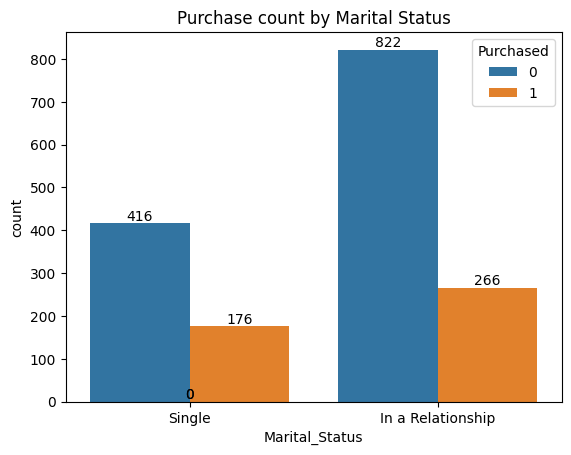

<Figure size 640x480 with 0 Axes>

In [21]:
'''
Creating the countplot of the number of purchases by customers marital status.
'''
ax = sns.countplot(x='Marital_Status', hue='Purchased', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Marital Status')
plt.show()
plt.savefig('Purchase count by Marital Status.png')

#From the viz, customers in a relationship are purchasing the product more that customers who are single.
#Nevertheless, the majority of customers not purchasing the product are also in a relationship.


In [22]:
'''
For computational convinience, the birth year should be changed to Age.
Therefore, we create a new column called "Age", and also drop the " Year_Birth" column
'''
import datetime

current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']
data.drop('Year_Birth', axis=1, inplace=True)
data['Age'].value_counts()

Age
48     66
52     65
54     62
49     61
46     61
59     60
53     60
51     58
55     53
50     49
66     45
64     42
72     41
68     40
47     38
45     38
65     38
58     37
70     36
56     35
57     35
62     34
61     34
42     33
69     33
38     33
71     31
63     30
60     30
41     29
67     28
43     28
44     28
35     27
73     26
36     26
39     24
37     22
40     21
74     20
75     18
76     18
78     13
33     12
34     11
32      9
77      8
80      7
79      6
81      5
31      4
30      3
29      3
28      2
125     1
131     1
83      1
124     1
Name: count, dtype: int64

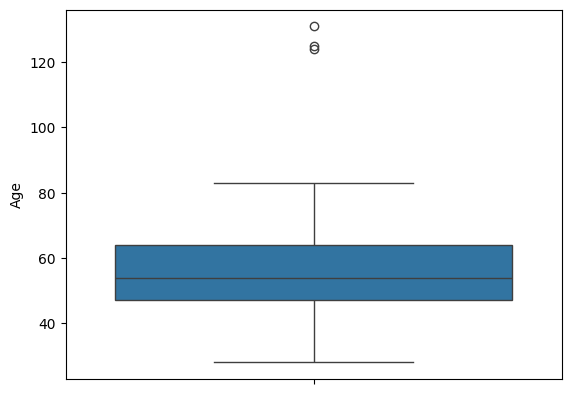

In [23]:
sns.boxplot(data['Age'])
plt.savefig('Age Boxplot.png')

In [ ]:
#Outliers

In [24]:
import numpy as np
import pandas as pd



# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data['Age'], 25)
Q3 = np.percentile(data['Age'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Filter out the outliers
filtered_data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

print("Outliers:")
print(outliers)
print("\nFiltered Data:")
print(filtered_data)


Outliers:
        ID Education     Marital_Status      Income Dt_Customer  Recency  \
192   7829        D3             Single  36640000.0  26-09-2013       99   
239  11004        D3             Single  60182000.0  17-05-2014       23   
339   1150        S3  In a Relationship  83532000.0  26-09-2013       36   

     MntCoke  MntFruits  MntMeatProducts  MntFishProducts  ...  \
192    15000       6000             8000             7000  ...   
239     8000          0             5000             7000  ...   
339   755000     144000           562000           104000  ...   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  Complain  Z_CostContact  Z_Revenue  Purchased  \
192                  5         1              3         11          0   
239              

In [25]:
data = data[data['Age']<100] # filtering the outliers.
#the filtering code data = data[data['Age']<100] is a way to filter outliers, assuming ages above 100 are considered outliers in your dataset.

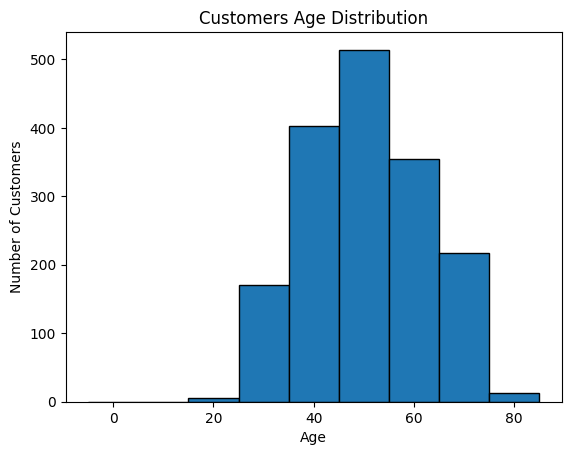

"\nThe customers age is normally distributed whereby the majority of customers are in their 50's.\nCustomers in their 40's are have the second highest frequency while customers in their 60's have the third.\nThe distribution of customers in their 30's and 70's is relatively similar with about 250 total customers.\nThere are few customers in their 20's and even fewer customers in their 80's.\n"

<Figure size 640x480 with 0 Axes>

In [26]:
hist, bins = np.histogram(data['Age'], bins=np.arange(0, data['Age'].max() + 10, 10))

plt.bar(bins[:-1], hist, width=10, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customers Age Distribution')
plt.show()
plt.savefig('Customers Age Distribution.png')
'''
The customers age is normally distributed whereby the majority of customers are in their 50's.
Customers in their 40's are have the second highest frequency while customers in their 60's have the third.
The distribution of customers in their 30's and 70's is relatively similar with about 250 total customers.
There are few customers in their 20's and even fewer customers in their 80's.
'''

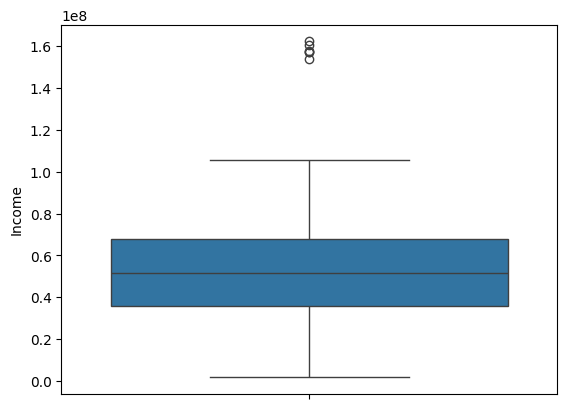

In [27]:
sns.boxplot(data['Income'])
plt.savefig('Income Boxplot.png')


In [25]:
#data = data[data['Income']<1.2] # filtering the outliers.

In [28]:
data.dtypes


ID                       int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Purchased                int32
Children                 int64
Age                      int64
dtype: object

In [29]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data.dtypes)

ID                              int64
Education                      object
Marital_Status                 object
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
Purchased                       int32
Children                        int64
Age                             int64
dtype: object


In [30]:
Monthly_Enrollment = data.set_index(data['Dt_Customer']).resample('MS').size() 
# Setting the date as the index, grouping it by months, and counting the total number of customer enrollment in each month.

Monthly_Enrollment

Dt_Customer
2012-07-01     2
2012-08-01    88
2012-09-01    71
2012-10-01    66
2012-11-01    75
2012-12-01    67
2013-01-01    81
2013-02-01    67
2013-03-01    72
2013-04-01    74
2013-05-01    82
2013-06-01    68
2013-07-01    76
2013-08-01    79
2013-09-01    66
2013-10-01    88
2013-11-01    69
2013-12-01    76
2014-01-01    62
2014-02-01    61
2014-03-01    79
2014-04-01    68
2014-05-01    88
2014-06-01    52
Freq: MS, dtype: int64

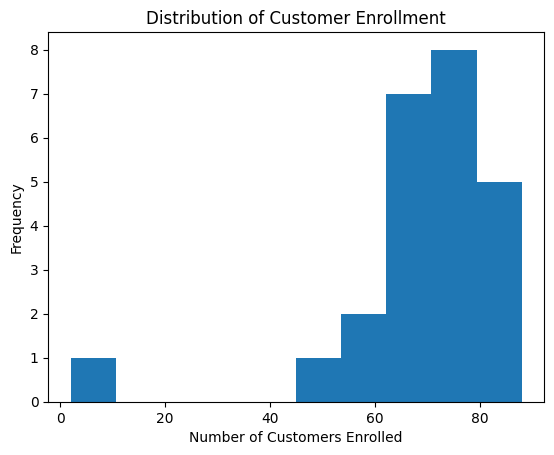

<Figure size 640x480 with 0 Axes>

In [31]:
plt.hist(Monthly_Enrollment)
plt.xlabel('Number of Customers Enrolled')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Enrollment')
plt.show()
plt. savefig('Distribution of Customer Enrollment.png')

In [32]:
data['Total_Spending'] = data['MntCoke']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [33]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [34]:
data.describe()

,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Purchased,Children,Age,Total_Spending
count,1.677000e+03,1677,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1.677000e+03
mean,5.199985e+07,2013-07-10 22:04:56.243291648,49.076923,2.341085,4.044126,2.671437,5.794872,5.335719,0.009541,0.262970,0.952892,55.024448,6.038265e+05
min,1.730000e+06,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000e+03
25%,3.579000e+07,2013-01-17 00:00:00,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,47.000000,6.900000e+04
50%,5.141200e+07,2013-07-11 00:00:00,50.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,54.000000,3.930000e+05
75%,6.789300e+07,2013-12-29 00:00:00,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000,1.000000,64.000000,1.034000e+06
max,1.623970e+08,2014-06-29 00:00:00,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,3.000000,83.000000,2.525000e+06
std,2.137447e+07,NaN,28.922053,1.967046,2.674320,2.973427,3.245470,2.449489,0.097239,0.440377,0.763611,11.650079,6.011542e+05


****Label Encoding****

In [35]:
# Performing label encoding for Education
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: D3
The numerical value 1 corresponds to: S1
The numerical value 2 corresponds to: S2
The numerical value 3 corresponds to: S3
The numerical value 4 corresponds to: SMA


In [36]:
# Performing label encoding for Marital_Status
label_encoder = LabelEncoder()
data['Marital_Status'] =label_encoder.fit_transform(data['Marital_Status'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: In a Relationship
The numerical value 1 corresponds to: Single


In [37]:
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Purchased,Children,Age,Total_Spending
0,1,1,58138000.0,2012-09-04,58,3,8,10,4,7,0,1,0,67,1617000
1,1,1,46344000.0,2014-03-08,38,2,1,1,2,5,0,0,2,70,27000
2,1,0,71613000.0,2013-08-21,26,1,8,2,10,4,0,0,0,59,776000
3,1,0,26646000.0,2014-02-10,26,2,2,0,4,6,0,0,1,40,53000
4,3,0,58293000.0,2014-01-19,94,5,5,3,6,5,0,0,1,43,422000


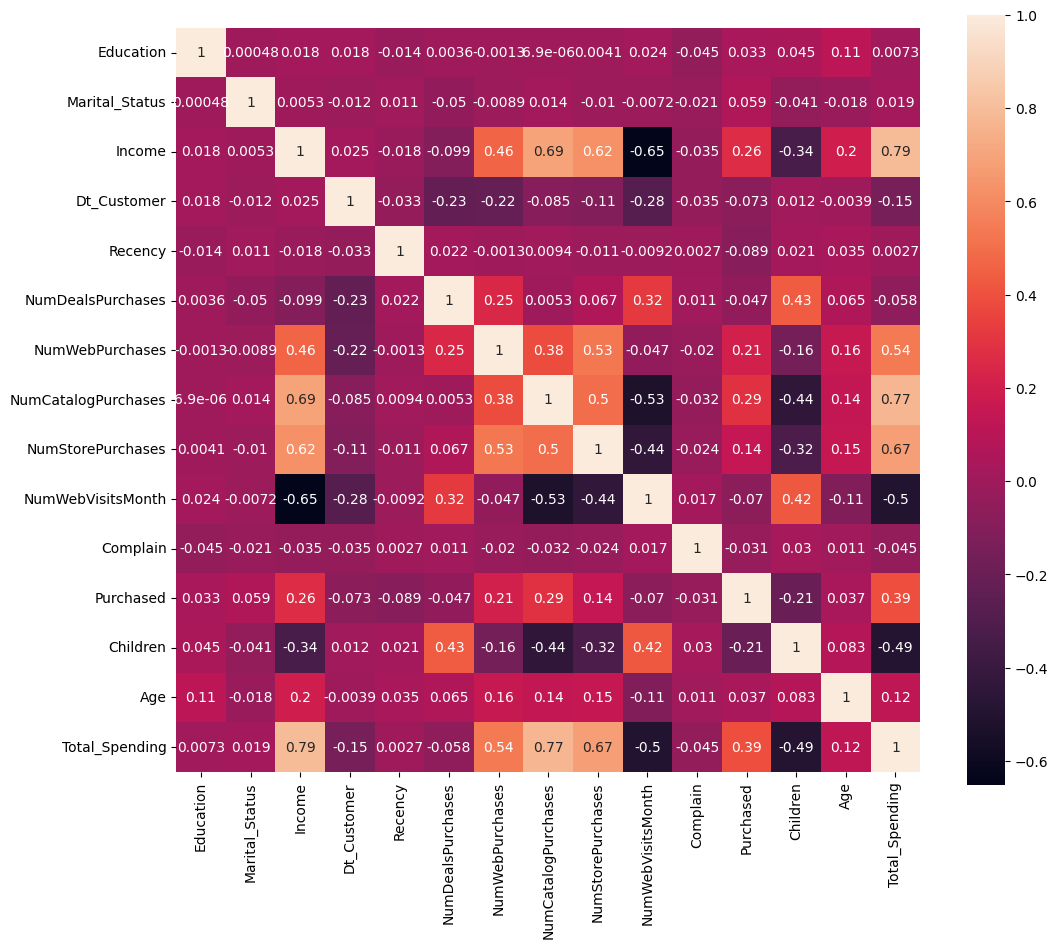

In [40]:
ax = plt.subplots( figsize =( 12 , 10 ) )
foo = sns.heatmap(data.corr(), vmax=1.0, square=True, annot=True)
plt.savefig('Correlation heatmap.png')

***Feature Scaling And Dimensionality Reduction***

In [38]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Purchased',
       'Children', 'Age', 'Total_Spending'],
      dtype='object')

In [39]:
segment = data.drop(['Education', 'Marital_Status', 'Dt_Customer', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Purchased','Children'], axis=1)

In [40]:
segment.head(3)

,Income,Recency,NumDealsPurchases,Age,Total_Spending
0,58138000.0,58,3,67,1617000
1,46344000.0,38,2,70,27000
2,71613000.0,26,1,59,776000


In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segment)

In [42]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA



#  Perform feature scaling on numerical columns 'Age' and 'Income'
scaler = StandardScaler()
data[['Age', 'Income']] = scaler.fit_transform(data[['Age', 'Income']])



In [43]:
# Apply PCA
pca = PCA(n_components=2)  # Number of principal components you want to keep
principal_components = pca.fit_transform(segment)

In [44]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Output the principal components
print("\nPrincipal Components:")
print(principal_df)


Principal Components:
      Principal Component 1  Principal Component 2
0              6.159192e+06         -876241.607013
1             -5.667289e+06          450742.465640
2              1.961212e+07          264603.051309
3             -2.535983e+07          -13874.286978
4              6.287544e+06          321913.540160
...                     ...                    ...
1672          -3.181058e+07         -186558.613599
1673          -2.442880e+07         -184185.051059
1674          -3.614153e+07         -237010.118561
1675          -2.459687e+06          145091.615085
1676          -1.877906e+07          114694.187564

[1677 rows x 2 columns]


In [45]:
# Explained variance and explained variance ratio
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Output the explained variance and explained variance ratio
print("\nExplained Variance:")
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance}")

print("\nExplained Variance Ratio:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {variance_ratio * 100:.2f}%")


Explained Variance:
Principal Component 1: 457094706377841.6
Principal Component 2: 134808791324.28964

Explained Variance Ratio:
Principal Component 1: 99.97%
Principal Component 2: 0.03%


In [46]:
# Optionally, concatenate the principal components with original data for reference
final_df = pd.concat([data, principal_df], axis=1)
print("\nFinal DataFrame with Principal Components:")
print(final_df)


Final DataFrame with Principal Components:
      Education  Marital_Status    Income Dt_Customer  Recency  \
0           1.0             1.0  0.287258  2012-09-04     58.0   
1           1.0             1.0 -0.264686  2014-03-08     38.0   
2           1.0             0.0  0.917871  2013-08-21     26.0   
3           1.0             0.0 -1.186528  2014-02-10     26.0   
4           3.0             0.0  0.294512  2014-01-19     94.0   
...         ...             ...       ...         ...      ...   
1678        3.0             0.0 -0.114931  2013-02-12      0.0   
1679        1.0             0.0 -0.878499  2014-01-23     28.0   
192         NaN             NaN       NaN         NaT      NaN   
239         NaN             NaN       NaN         NaT      NaN   
339         NaN             NaN       NaN         NaT      NaN   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                   3.0              8.0                 10.0   
1                   2.0          

In [47]:
kmeans = KMeans()
kmeans.fit(scaled_features)

KMeans()

In [48]:
cluster_range = range(2,21)
inertia_range = []
silhoute_range = []
for i in cluster_range:
  kmeans_i = KMeans(n_clusters=i, init='random')
  kmeans_i.fit(scaled_features)
  inertia_range.append(kmeans_i.inertia_)
  silhoute_range.append(metrics.silhouette_score(scaled_features, kmeans_i.labels_))

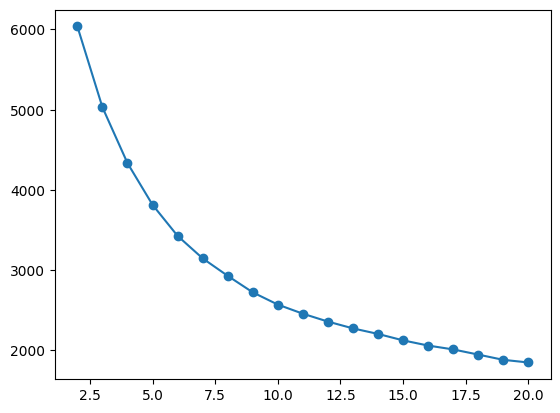

In [49]:
plt.plot(cluster_range, inertia_range, marker='o')
plt.savefig('Elbow graph.png')

In [50]:
print(list(cluster_range))
print()
print(list(inertia_range))
print()
print(list(silhoute_range))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

[6037.257651200414, 5029.829477307139, 4333.671467894302, 3814.1355505256406, 3426.7155234880543, 3146.786143893133, 2928.875590823589, 2723.141755535913, 2570.4020089225355, 2456.889986194401, 2358.5353553163927, 2273.7526965766497, 2204.804572544963, 2124.474851920504, 2059.7678122081543, 2011.5884746886895, 1947.2413274906523, 1881.7231176428736, 1848.7973679305373]

[0.27847728305448055, 0.2800534508903717, 0.24151048676853987, 0.23541980860339295, 0.23358550494740077, 0.22878762808692188, 0.21960640055931968, 0.22689999460582577, 0.2216897607014, 0.2228331918589829, 0.2181197811196682, 0.22069124683474103, 0.20535378495161036, 0.20161961725651492, 0.20330518564313285, 0.19742063396959073, 0.19868375019782317, 0.1988903300141412, 0.20347500419516187]


In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
kmeans.labels_

array([2, 0, 2, ..., 0, 0, 0])

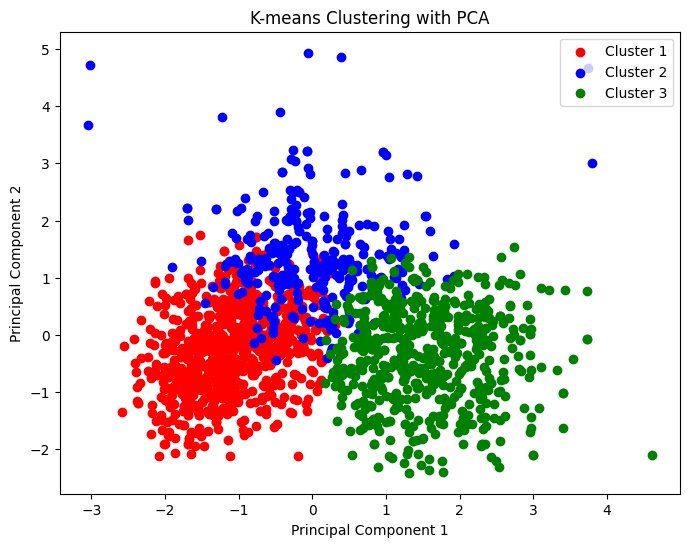

<Figure size 640x480 with 0 Axes>

In [52]:
# Perform PCA on the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Plot the scatter plot of the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(pca_data[kmeans.labels_ == i, 0], pca_data[kmeans.labels_ == i, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
plt.savefig('KMeans Clusterign with PCA.png')

***Classifiaction***

In [53]:
cols = ['Dt_Customer', 'Purchased']
X = data.drop(cols, axis=1)
X.head(3)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Children,Age,Total_Spending
0,1,1,0.287258,58,3,8,10,4,7,0,0,1.028244,1617000
1,1,1,-0.264686,38,2,1,1,2,5,0,2,1.285830,27000
2,1,0,0.917871,26,1,8,2,10,4,0,0,0.341349,776000


In [55]:
y = data['Purchased'].copy()
y.head(3)

0    1
1    0
2    0
Name: Purchased, dtype: int32

***Training and Testing sets***

In [56]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the sample sizes using f-strings
total_sample_size = data.shape[0]
feature_training_sample_size = X_train.shape[0]
target_training_sample_size = y_train.shape[0]
feature_testing_sample_size = X_test.shape[0]
target_testing_sample_size = y_test.shape[0]

print(f"Total sample size = {total_sample_size};\n"
      f"Feature training sample size = {feature_training_sample_size},\n"
      f"Target training sample size = {target_training_sample_size},\n"
      f"Feature testing sample size = {feature_testing_sample_size},\n"
      f"Target testing sample size = {target_testing_sample_size}")


Total sample size = 1677;
Feature training sample size = 1341,
Target training sample size = 1341,
Feature testing sample size = 336,
Target testing sample size = 336


In [57]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Create a KNN classifier with 10 neighbors and distance-based weighting
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

# Fit the model using the training data
knn_model = knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76


***Decision Tree***

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split



# Create a Decision Tree classifier with specified hyperparameters
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_weight_fraction_leaf=0.01)

# Fit the model using the training data
dt_model = dt.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Accuracy: 0.74
Precision: 0.78
Recall: 0.74
F1 Score: 0.75


***Logistic Regression***

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


# Create a Logistic Regression classifier
lgr = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence

# Fit the model using the training data
lgr_model = lgr.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = lgr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.78
Precision: 0.76
Recall: 0.78
F1 Score: 0.76


***Bagging***

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


# Create a Bagging classifier with KNN as the base estimator
bagging = BaggingClassifier(
    KNeighborsClassifier(n_neighbors=2, weights='distance'),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
)

# Fit the model using the training data
bag_model = bagging.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bag_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.77
Precision: 0.76
Recall: 0.77
F1 Score: 0.76


***Random Forest Classifier***

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split


# Create a Random Forest classifier with specified hyperparameters
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.02
)

# Fit the model using the training data
rf_model = rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.79
Precision: 0.82
Recall: 0.79
F1 Score: 0.80


***Gradient Boosting***

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# Create a Gradient Boosting classifier with specified hyperparameters
gb = GradientBoostingClassifier(
    loss='exponential',
    n_estimators=1000,
    learning_rate=0.5,
    max_depth=3,
    subsample=0.5,
    random_state=15
)

# Fit the model using the training data
gb_model = gb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")





Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1 Score: 0.80


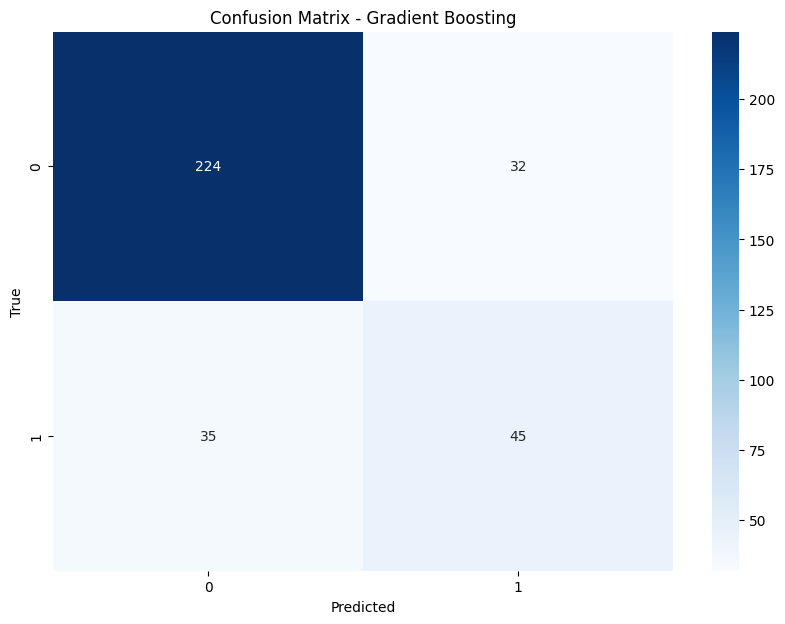

In [63]:
# Compute the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion_Matrix_Gradient_Boosting.png')
plt.show()


***Extreme Gradient Boosting***

In [64]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from xgboost import XGBClassifier, DMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt



# Create a DMatrix
data_dmatrix = DMatrix(data=X, label=y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Declare parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 500
}

# Instantiate the classifier
xgb = XGBClassifier(**params)

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81


***CLASSIFICATION MODELS SUMMARY:***

Different classification models and ensembles were used for prediction; KNN, Decision Trees, and Logistic Regression classifiers; and Random Forests, Bagging, Gradient Boosting, Extreme Gradient Boosting ensembles.

***Performance Comparison***

Highest Accuracy: KNN with an accuracy of 0.84.
Highest Precision: KNN with a precision of 0.83.
Highest Recall: KNN with a recall of 0.84.
Highest F1 Score: KNN with an F1 score of 0.83.

***Observations:***

KNN has the best overall performance in terms of accuracy, precision, recall, and F1 score.
Bagging and XGBoost also show strong performance with similar metrics, slightly trailing behind KNN.
Decision Tree has the lowest performance metrics across all the evaluated models.
Logistic Regression and Random Forest offer moderate performance, better than Decision Tree but not as strong as KNN, Bagging, or XGBoost.
Gradient Boosting shows good performance, better than Decision Tree, Logistic Regression, and Random Forest, but slightly behind KNN, Bagging, and XGBoost.


***Future Work***

1.Explore Deep Learning

Experiment with deep learning models like neural networks (DNNs), convolutional networks (CNNs), and recurrent networks (RNNs) for potentially higher accuracy in capturing complex patterns.

2.Update Model with New Data

Implement scheduled retraining to keep the model current and accurate as new data becomes available.

3.Address Imbalanced Data

Use techniques like oversampling (SMOTE), undersampling, or hybrid methods to handle imbalanced class distributions and improve model performance.

4.Enhance Predictive Power

Conduct feature engineering to create new meaningful features from existing data.
Consider incorporating external data sources for additional context and relevance.